**Submitted By: Zainab Anwaar**


**CMS ID: 339636**

Importing Libraries

In [613]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline



---

Loading Dataset

In [614]:
#loading dataset
dataset =pd.read_csv('dataset.csv')
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450




---
Checking for Missing Values


In [615]:
#Getting basic information such as datatype and non null values count for each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [616]:
#Since the missing values in the loaded dataset are marked as "?", so we will replace it with NaN value
dataset.replace('?', np.nan, inplace=True)
missing_info =dataset.isnull().sum()
print(missing_info)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [617]:
#Now the missing values are shown as Nan
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [618]:
#To get the unique Values of each feature for tranforming categorical to numeric data
print(dataset.nunique())

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64


In [619]:
#For transforming datatype of features from object to int
columns=["make","fuel-type","body-style","aspiration","drive-wheels","engine-location","engine-type","fuel-system"]
for column in columns:
  dataset[column]=dataset[column].astype('category').cat.codes


In [620]:
#Mapping equivalent numbers
map1={'two':2,'four':4}
map2={'eight':8,'two':2,'twelve':12,'three':3,'four':4,'five':5,'six':6}

dataset['num-of-doors'] = dataset['num-of-doors'].map(map1)
dataset['num-of-cylinders'] = dataset['num-of-cylinders'].map(map2)

In [621]:
#Converting String to Equivalent Float Numbers
cols=['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for col in cols:
  dataset[col]=dataset[col].astype(float)


In [622]:
#feature extraction
dataset['power-to-weight'] = dataset['horsepower'] / dataset['curb-weight']

In [623]:
# impute missing values with mean
cols=["stroke",'bore','price','horsepower','peak-rpm','num-of-doors','normalized-losses','power-to-weight']
for col in cols:
  mean=0
  mean=dataset[col].mean()
  dataset[col].fillna(mean, inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power-to-weight
0,3,122.0,0,1,0,2.0,0,2,0,88.6,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.043564
1,3,122.0,0,1,0,2.0,0,2,0,88.6,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.043564
2,1,122.0,0,1,0,2.0,2,2,0,94.5,...,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.054552
3,2,164.0,1,1,0,4.0,3,1,0,99.8,...,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.043646
4,2,164.0,1,1,0,4.0,3,0,0,99.4,...,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.040722




---



**Checking performance of Linear Regression Model before feature engineering**

In [624]:
#Splitting X and y 
X = dataset.drop('price', axis=1)
y = dataset['price'] 
#Splitting Training and Testing Data
xtrain = X[0:int(X.shape[0]*0.8)]
xtest= X[int(X.shape[0]*0.8):]
ytrain = y[0:int(y.shape[0]*0.8)]
ytest= y[int(y.shape[0]*0.8):]
#Linear Regression Model
lr = LinearRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
#Checking Performance
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error: {:.2f}".format(mse))
print(f'R2 score: {r2:.2f}')

Mean Absolute Error: 2131.7214933275995
Mean Squared Error: 7495269.13
R2 score: 0.58


Results (before feature engineering):


1.   Mean Absolute Error: 2131.7214933275995

1.   Mean Squared Error: 7495269.13

1.   R2 score: 0.58




---


Scaling Data

In [625]:
#Scaling Numerical Data
scaler = MinMaxScaler()
numeric_cols = ['normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])
dataset.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power-to-weight
0,3,0.298429,0,1,0,2.0,0,2,0,0.058309,...,5,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959,0.043564
1,3,0.298429,0,1,0,2.0,0,2,0,0.058309,...,5,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558,0.043564
2,1,0.298429,0,1,0,2.0,2,2,0,0.230321,...,5,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558,0.054552
3,2,0.518325,1,1,0,4.0,3,1,0,0.384840,...,5,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254,0.043646
4,2,0.518325,1,1,0,4.0,3,0,0,0.373178,...,5,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142,0.040722




---



Feature Selection

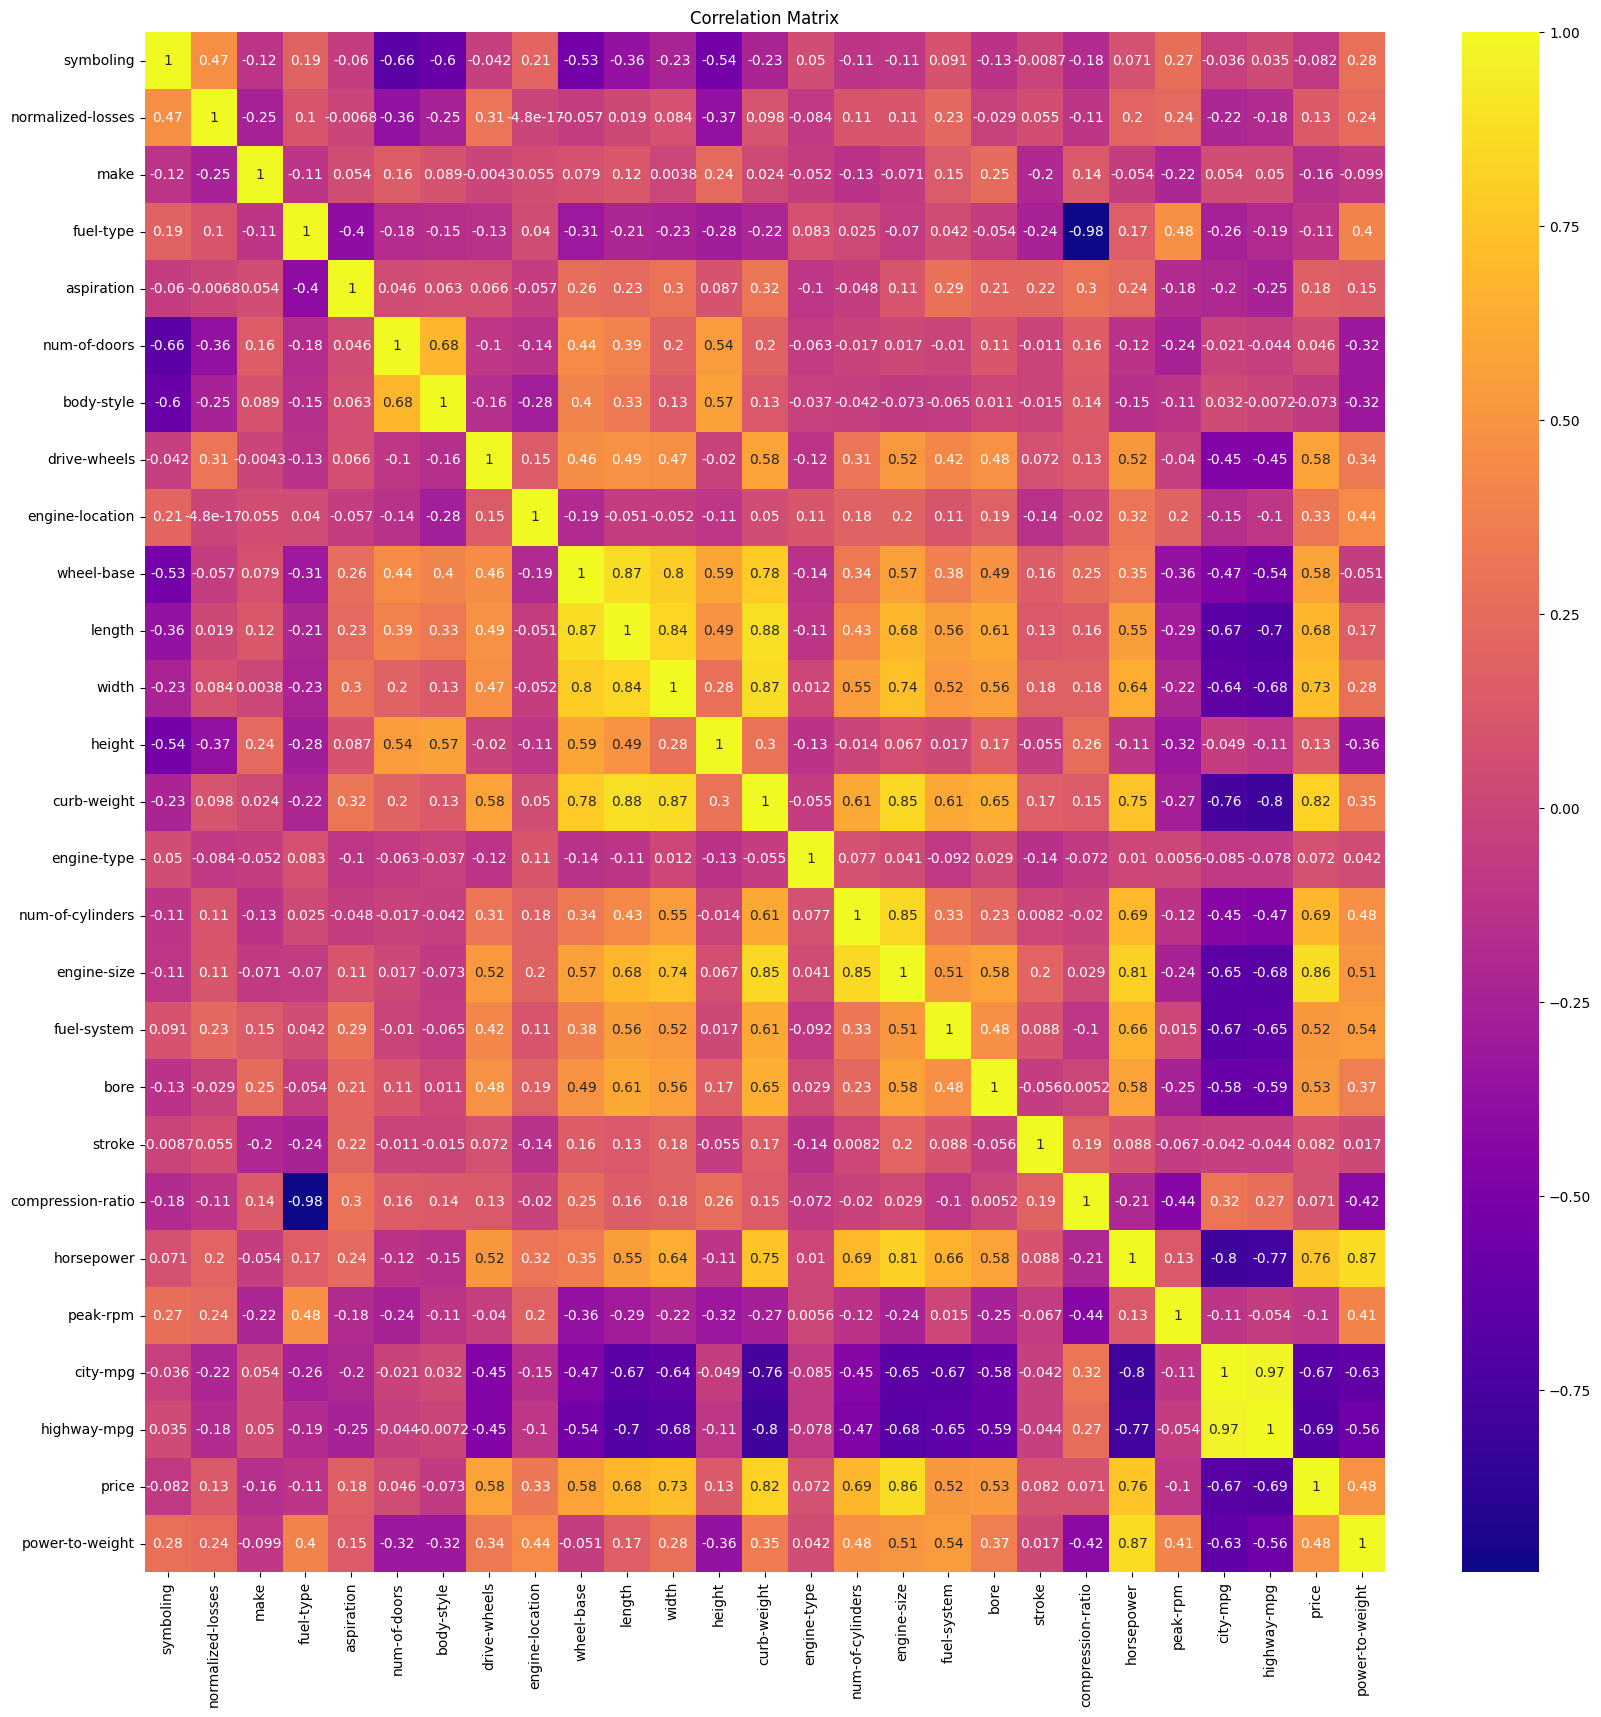

In [626]:
#Displaying Correlation Matrix to Visualize the correlation of each feature
corr_matrix=dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title("Correlation Matrix")
plt.show()


In [627]:
#Best features are those features which have an absolute correlation of 0.1 or more with the target var i.e. "price"
best_features=corr_matrix.index[abs(corr_matrix['price'])>0.1]
print(best_features)

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'power-to-weight'],
      dtype='object')


In [628]:
#dataset will now contain only the best_features
dataset = dataset[best_features]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   make               205 non-null    int8   
 2   fuel-type          205 non-null    int8   
 3   aspiration         205 non-null    int8   
 4   drive-wheels       205 non-null    int8   
 5   engine-location    205 non-null    int8   
 6   wheel-base         205 non-null    float64
 7   length             205 non-null    float64
 8   width              205 non-null    float64
 9   height             205 non-null    float64
 10  curb-weight        205 non-null    float64
 11  num-of-cylinders   205 non-null    int64  
 12  engine-size        205 non-null    float64
 13  fuel-system        205 non-null    int8   
 14  bore               205 non-null    float64
 15  horsepower         205 non-null    float64
 16  peak-rpm           205 non



---

Handling Outliers


In [629]:
#Getting columns with continous data 
unique_counts = dataset.nunique()
cols_continuous = unique_counts[unique_counts > 10].index
dataset_cont = dataset[cols_continuous]
dataset_cont = dataset_cont.columns.to_numpy()
print(dataset_cont)

['normalized-losses' 'make' 'wheel-base' 'length' 'width' 'height'
 'curb-weight' 'engine-size' 'bore' 'horsepower' 'peak-rpm' 'city-mpg'
 'highway-mpg' 'price' 'power-to-weight']


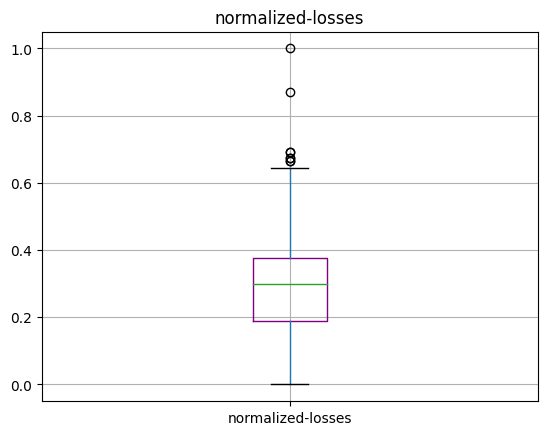

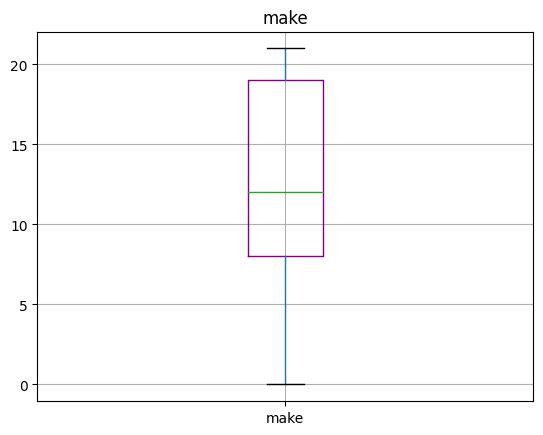

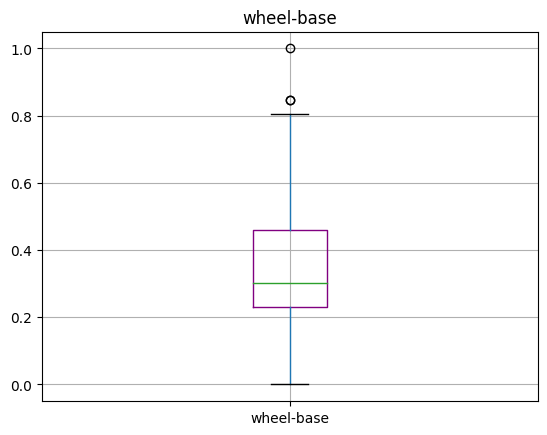

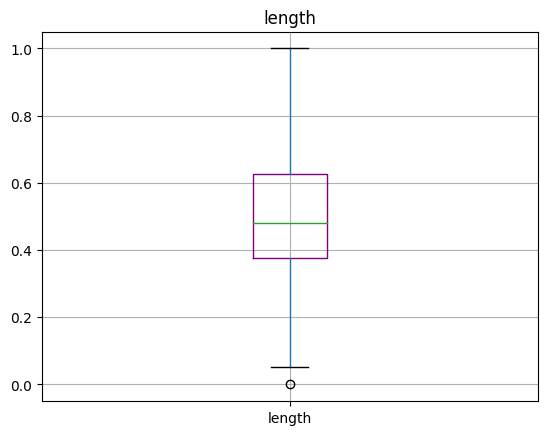

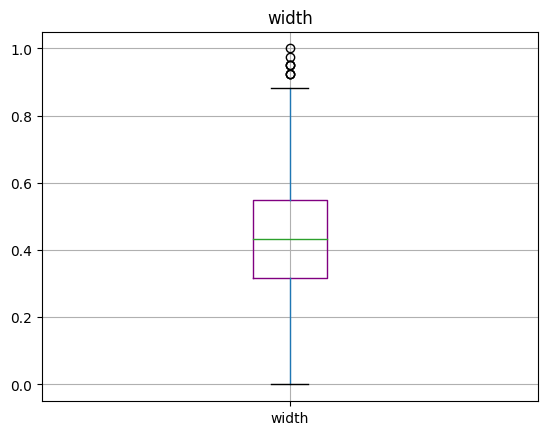

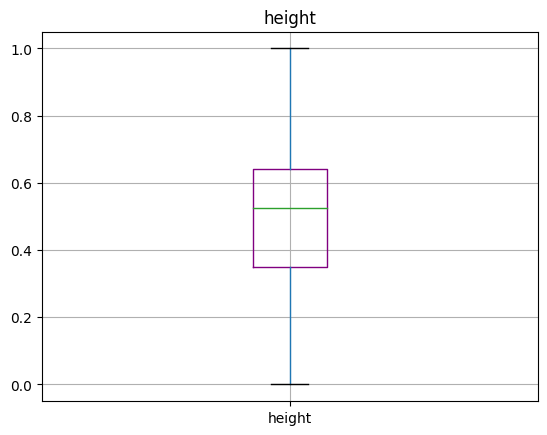

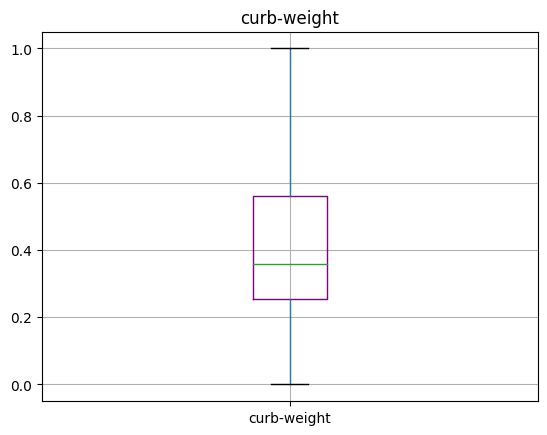

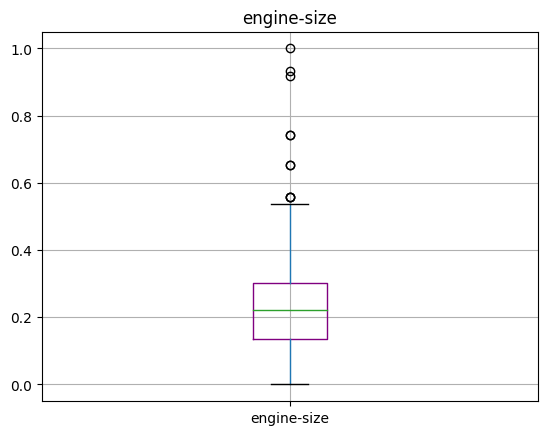

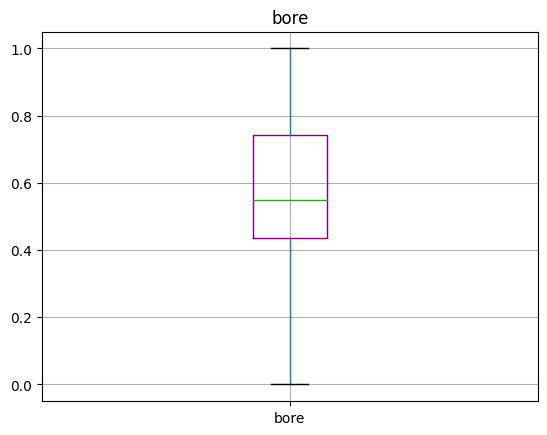

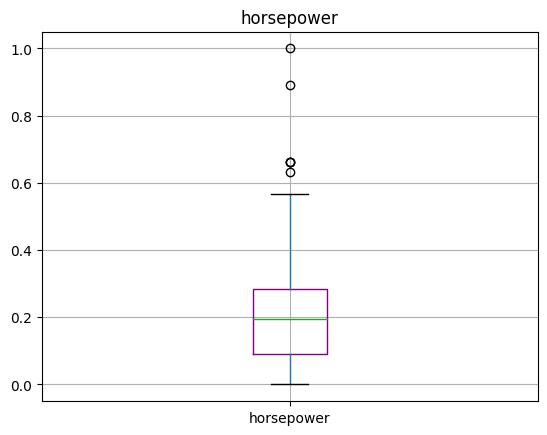

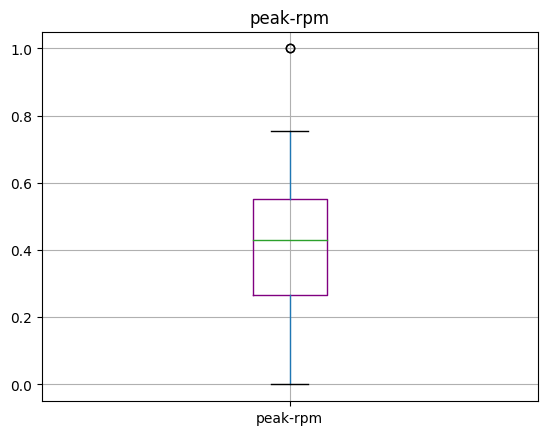

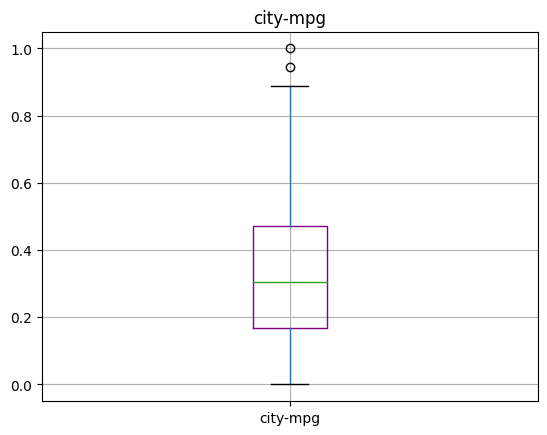

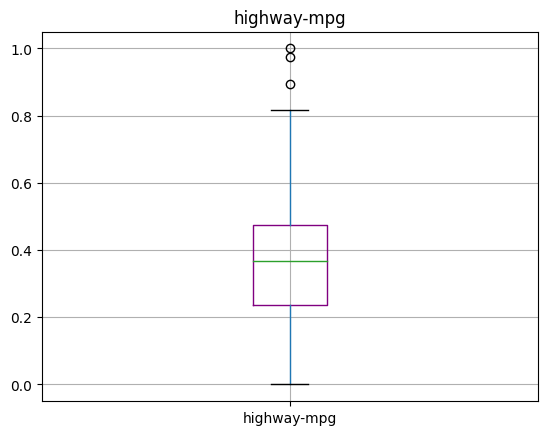

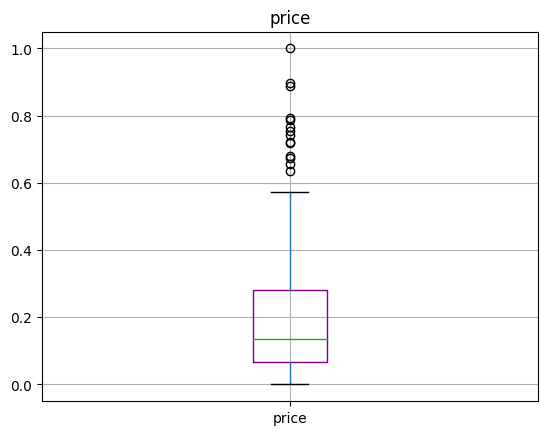

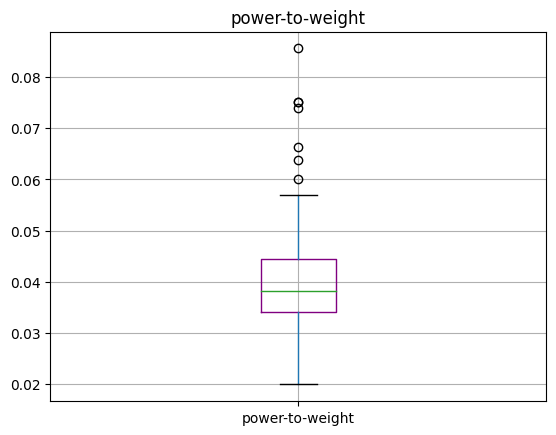

In [630]:
#Making Boxplots to chek outliers visually
for column in dataset_cont:
    dataset[[column]].boxplot(boxprops=dict(color='purple'))
    plt.title(column)
    plt.show()

In [631]:
#Ckecking Skewness of Each Field
print("Before Removing Outliers")
print("Skewness of Fields")
for column in dataset_cont:
  print(column,":",dataset[column].skew())

Before Removing Outliers
Skewness of Fields
normalized-losses : 0.8548022766908571
make : -0.2446714401379292
wheel-base : 1.05021377587149
length : 0.15595377132154956
width : 0.9040034987862507
height : 0.0631227324719305
curb-weight : 0.6813981890525873
engine-size : 1.9476550452788106
bore : 0.020210711151588526
horsepower : 1.3977631283295833
peak-rpm : 0.07359121245641574
city-mpg : 0.6637040288148167
highway-mpg : 0.5399971878746743
price : 1.8273241596359222
power-to-weight : 1.3880865961050683


In [632]:
#Removing Outliers by IQR Method

for column in dataset_cont:
  Q1=dataset[column].quantile(0.25)
  Q3=dataset[column].quantile(0.75)
  IQR=Q3-Q1
  upper_limit = Q3 +  IQR*1.5
  lower_limit = Q1 - IQR*1.5
  dataset[column] = np.where(
        dataset[column] > upper_limit,
        upper_limit,
        np.where(
            dataset[column] < lower_limit,
            lower_limit,
            dataset[column]
        )
    )


In [633]:
#Checking Skewness of the indicated columns in cols after removing outliers
print("\nAfter Removing Outliers")
for column in dataset_cont:
  print(column,":",dataset[column].skew())


After Removing Outliers
normalized-losses : 0.46136946797065825
make : -0.2446714401379292
wheel-base : 0.9249160965378543
length : 0.1559537713215497
width : 0.7762776833615607
height : 0.0631227324719305
curb-weight : 0.6813981890525873
engine-size : 0.908453313386208
bore : 0.020210711151588526
horsepower : 0.8051373562320845
peak-rpm : 0.04836139181843008
city-mpg : 0.6045935079275703
highway-mpg : 0.34744108259888323
price : 1.238353263850548
power-to-weight : 0.5064742848372309


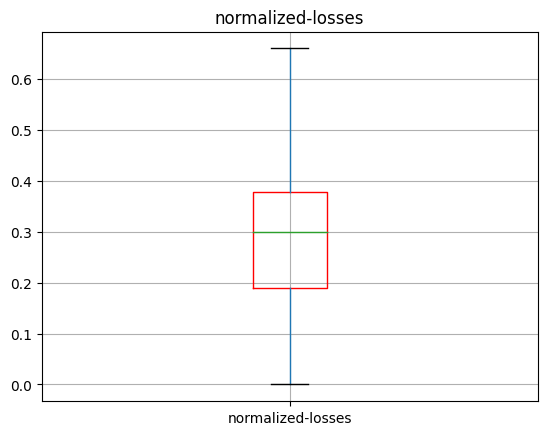

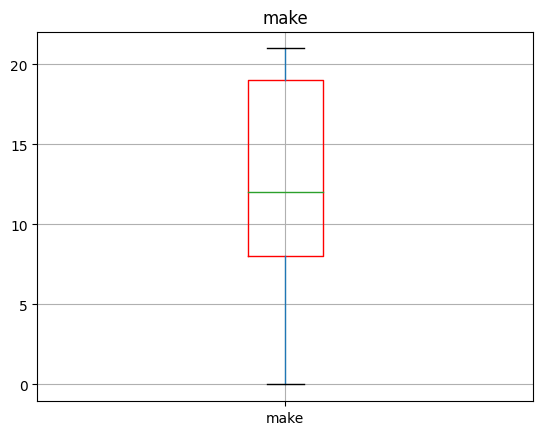

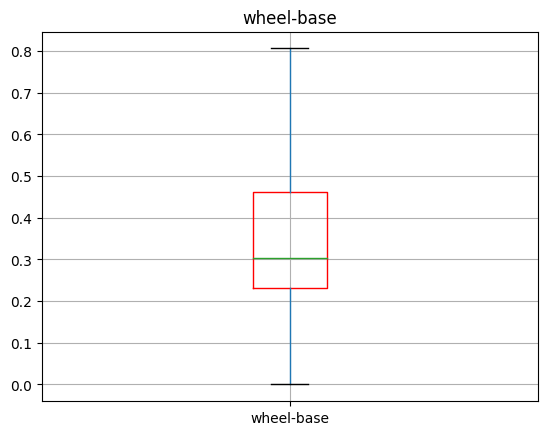

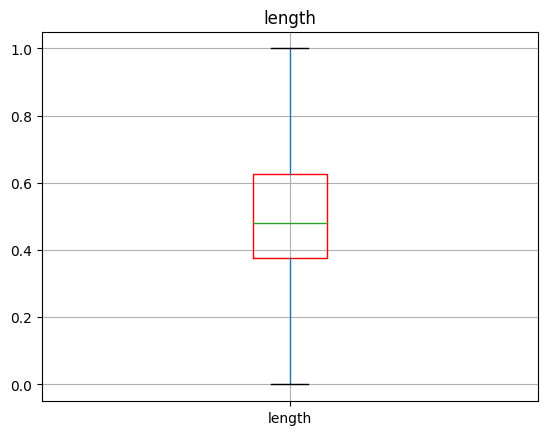

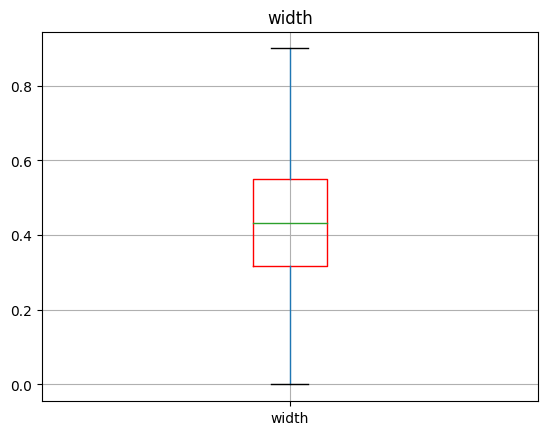

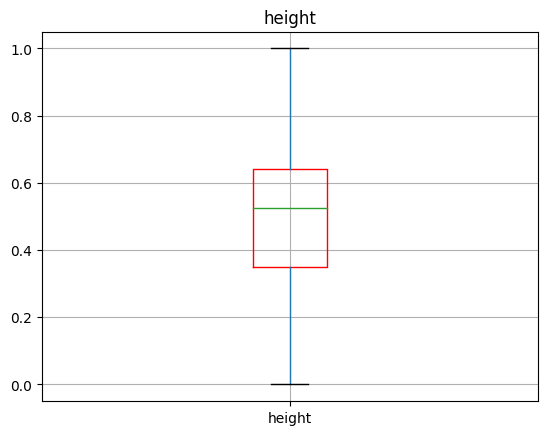

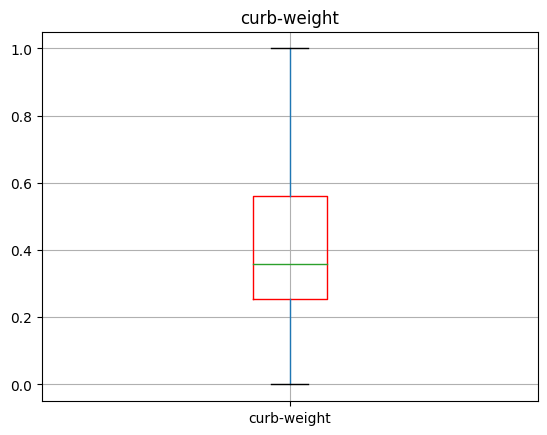

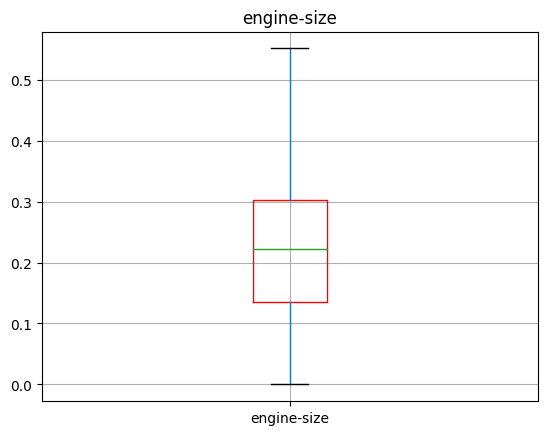

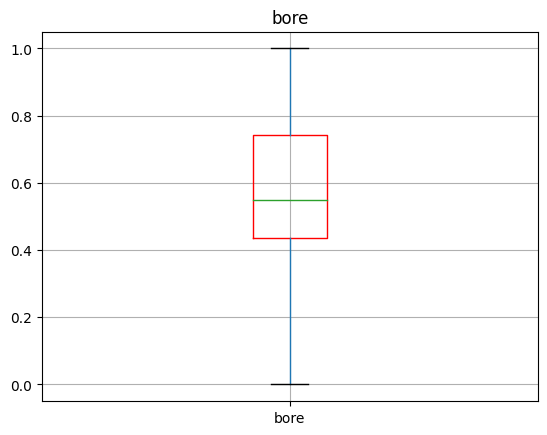

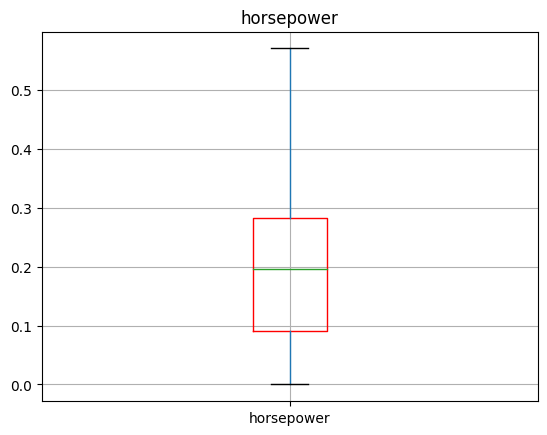

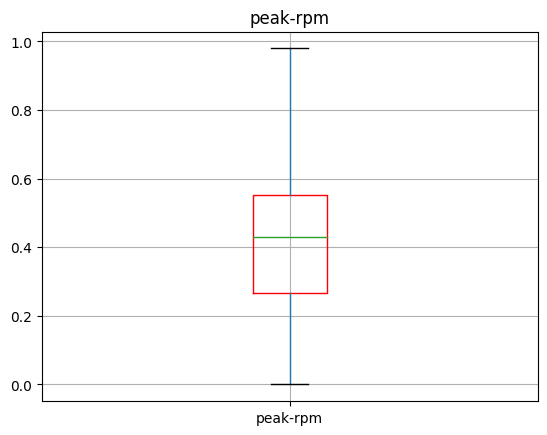

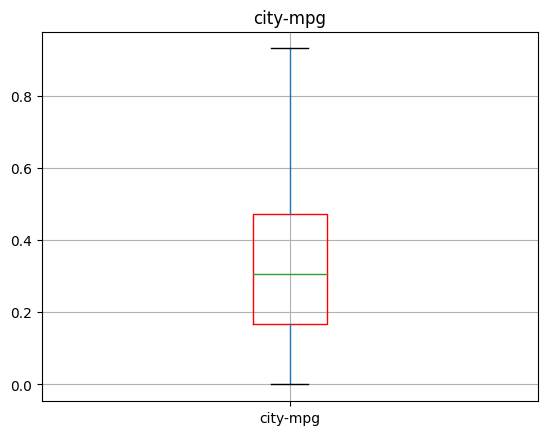

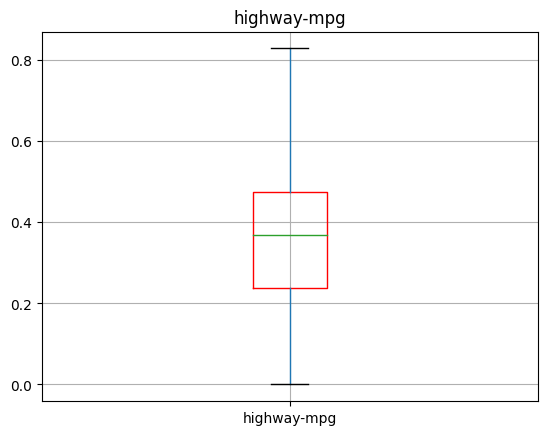

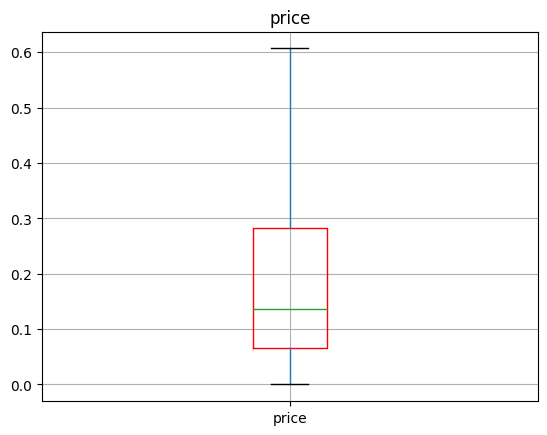

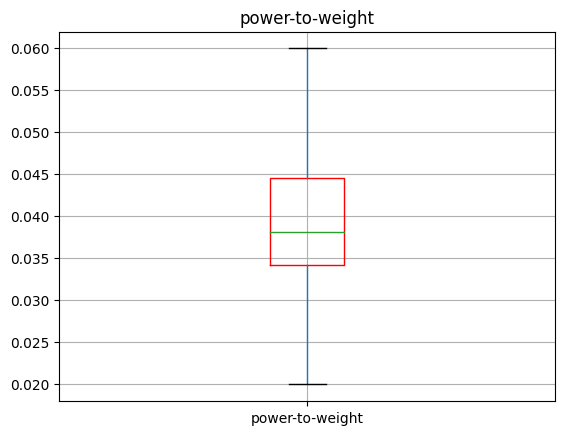

In [634]:
#After correcting outliers 
for column in dataset_cont:
    dataset[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

In [635]:
#Splitting X and y 
X = dataset.drop('price', axis=1)
y = dataset['price'] 

In [636]:
#Splitting trianing and testing data
xtrain = X[0:int(X.shape[0]*0.8)]
xtest= X[int(X.shape[0]*0.8):]
ytrain = y[0:int(y.shape[0]*0.8)]
ytest= y[int(y.shape[0]*0.8):]


In [637]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error: {:.2f}".format(mse))
print(f'R2 score: {r2:.2f}')

Mean Absolute Error: 0.04738082086543695
Mean Squared Error: 0.00
R2 score: 0.64


Results (before feature engineering):


1.   Mean Absolute Error: 0.04738082086543695

1.   Mean Squared Error: 0.00
1.   R2 score: 0.64
